In [1]:
from sympy import *
import numpy as np
import math

Checking Some Derivatives

In [2]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
%matplotlib inline

In [3]:
__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

In [4]:
xb, z, Omega, w = symbols ('xb z Omega w', real=True, nonzero=True)


In [5]:
x = diff ((Omega * (1+z)**(3 * (1 + w)) * (1 -((1+z) / xb)**(3 * (1 - w)))), z,1)
print(x)



-Omega*((z + 1)/xb)**(3 - 3*w)*(3 - 3*w)*(z + 1)**(3*w + 3)/(z + 1) + Omega*(1 - ((z + 1)/xb)**(3 - 3*w))*(3*w + 3)*(z + 1)**(3*w + 3)/(z + 1)


In [6]:
xb = 1.0*10**25
w = 0.33
Omega = 1
l = -43
z = 2.0

In [7]:
N = 1 / (Omega * (xb * math.exp(-abs(l)))**(3 * (1 + w)) * (1 -(math.exp(-abs(l)))**(3 * (1 - w))))**(1/2)
dndtau = ((xb*math.exp(-abs(l)))**(-3*w - 3)*(0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l)))*(3*w + 3)*l+ 0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(3*w - 3)*math.exp(-(3 - 3*w)*abs(l))*l))/(Omega*(Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l))))**0.5*(1 - math.exp(-(3 - 3*w)*abs(l))))
num = (xb*math.exp(-abs(l)))**(-3*w - 3)*(0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l)))*(3*w + 3)*l+ 0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(3*w - 3)*math.exp(-(3 - 3*w)*abs(l))*l)
dndtau2 = (2.25*(xb*math.exp(-abs(l)))**(-6*w - 6)*(xb*math.exp(-abs(l)))**(6*w + 6)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1))**2/(math.exp(3*(w - 1)*abs(l)) - 1) + 4.5*(xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(w - 1)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1))*math.exp(3*(w - 1)*abs(l))/(math.exp(3*(w - 1)*abs(l)) - 1) - 4.5*(xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(w + 1)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1)) - (xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(4.5*(w - 1)**2*math.exp(3*(w - 1)*abs(l)) - 9.0*(w - 1)*(w + 1)*math.exp(3*(w - 1)*abs(l)) + 4.5*(w + 1)**2*(math.exp(3*(w - 1)*abs(l)) - 1)))/((-Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(math.exp(3*(w - 1)*abs(l)) - 1))**0.5*(math.exp(3*(w - 1)*abs(l)) - 1))
x = xb * math.exp(- abs(l))
print(0.7 / (N * x**3), N)

3.0770466144546744e-07 2.404097794717623e-13


In [8]:
E2 = (Omega * (1+z)**(3 * (1 + w)) * (1 -((1+z) / xb)**(3 * (1 - w))))
d2E2dz2 = 3*Omega*(z + 1)**(3*w + 3)*(6*((z + 1)/xb)**(3 - 3*w)*(w - 1)*(w + 1) - ((z + 1)/xb)**(3 - 3*w)*(w - 1)*(3*w - 2) + (1 - ((z + 1)/xb)**(3 - 3*w))*(w + 1)*(3*w + 2))/(z + 1)**2
dE2dz = -Omega*((z + 1)/xb)**(3 - 3*w)*(3 - 3*w)*(z + 1)**(3*w + 3)/(z + 1) + Omega*(1 - ((z + 1)/xb)**(3 - 3*w))*(3*w + 3)*(z + 1)**(3*w + 3)/(z + 1)
print(E2, d2E2dz2, dE2dz)
cosmo1 = Nc.HICosmo.new_from_name(Nc.HICosmo, "NcHICosmoSFB")




80.11499433794584 106.19776599456976 106.552942469468
80.11499433794584


In [9]:
lnX_B = log (1.0e25);
x = z + 1.0;
lnx = log(x);
w = 0.33;
x_3_1pw = pow (x, 3.0 * (1.0 + w));
x_2_p3w = pow (x, 2.0 + 3.0 * w);
x_1_p3w = pow (x, 1.0 + 3.0 * w);
Omega_w = 1;
e_3t_1mw = (exp (-3.0 *(1.0 - w) * (lnx - lnX_B)) - 1.0);
E2 = Omega_w *x_3_1pw * e_3t_1mw;
E = sqrt(E2);
e_3t1w = exp (-3.0 *(1.0 - w) * (lnx - lnX_B));
dEdz = Omega_w * x_2_p3w * (3.0 * (1.0 + w) - 6.0 * w * e_3t1w);
dEdz2 = Omega_w * x_1_p3w * (3.0 * (1.0 + w) * (3.0 * w + 2.0) - 6.0 * w * (6.0 * w + 1.0) * e_3t1w);
result = 2.0 * dEdz * dEdz + 2.0 * E * dEdz2
print(dEdz, dEdz2, result)

-1.03334185323554e+51 -1.02645290754731e+51 2.13559077129653e+102


In [10]:
lp_RH= 1.0 / (Ncm.C.hubble_radius_hm1_planck () / 0.7)

In [11]:
cosmo = Nc.HICosmo.new_from_name(Nc.HICosmo, "NcHICosmoSFB")
csq1d = Nc.HIPertAdiab.new ()

ki    = 1.0e1
kf    = 1.0e9
k_a   = np.geomspace (ki, kf, 5)
csq1d.set_k (kf)
(Found2, etafa) = csq1d.find_adiab_time_limit (cosmo, t0=20.0, t1=100.0, reltol=1.0e1)

print (f"{Found2}, {etafa}")

csq1d.set_k (ki)
(Found1, etaia) = csq1d.find_adiab_time_limit (cosmo, t0=-100.0, t1=20.0, reltol=1.0e1)

print (f"{Found1}, {etaia}")


True, 37.01764822306717
True, -54.865466933188785


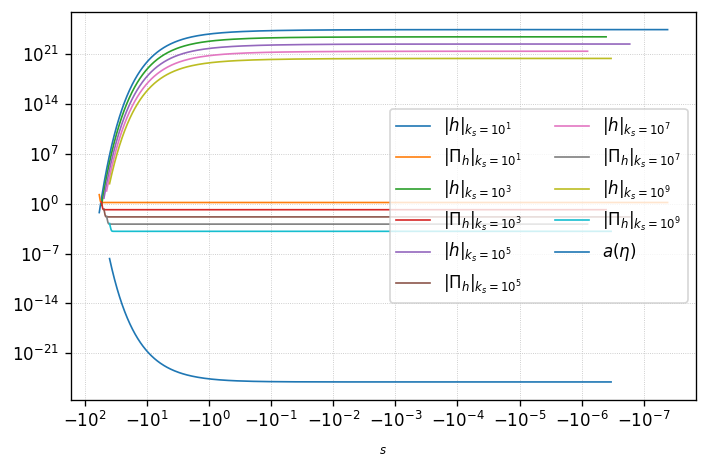

In [12]:
fig = plt.figure (dpi = 120)
max_etaf = 200.0
min_etai = -200.0

for k in k_a:
  csq1d.set_k (k)
  csq1d.set_reltol (1.0e-5)

  (Found1, etai)  = csq1d.find_adiab_time_limit (cosmo, -100.0, 20.0, 1.0e-5)
  (Found2, etafa) = csq1d.find_adiab_time_limit (cosmo, -100.0, 100.0, 1.0e-1)
  etaf = etafa * 10
  csq1d.set_ti (etai)
  csq1d.set_init_cond_adiab (cosmo, etai)
  csq1d.prepare(cosmo)
  min_etai = min (etai, min_etai)
  max_etaf = max (etaf, max_etaf)
#Check if the derivatives are right with sympy and then check why is init_cond_adiab crashing for some momentum. Find a   
  eta_a, eta_s = csq1d.get_time_array ()
     
  y_a          = []
  Abs_phi2_a   = []
  Abs_Pphi2_a  = []
  myt = []

  eta_a = np.array (eta_a)
  for eta in eta_a:
    (J11, J12, J22) = csq1d.get_J_at (cosmo, eta)
    if eta <= 0.0:
      Abs_phi2_a.append (J11)
      Abs_Pphi2_a.append (J22)
      myt.append(eta)
    else:
      pass
  y_a         = np.array (y_a)
  Abs_phi2_a  = np.array (Abs_phi2_a)
  Abs_Pphi2_a = np.array (Abs_Pphi2_a)

  mylw    = 1

  plt.plot (myt, np.sqrt (Abs_phi2_a), lw=mylw, label = r'$\vert h\vert_{k_s = 10^{%0.2g}}$' % math.log10 (k))
  plt.plot (myt, np.sqrt (Abs_Pphi2_a), lw=mylw, label = r'$\vert\Pi_h\vert_{k_s = 10^{%0.2g}}$' % math.log10 (k))

etac_a = np.geomspace (min_etai, -eta_s, 1000)
etae_a = np.geomspace (eta_s, max_etaf, 1000)
eta_a  = np.concatenate ((etac_a, etae_a))
a_a    = np.array ([10**(-25)*math.exp(abs(eta)) for eta in myt])
a_b    = min (a_a)

plt.plot (myt, a_a, lw=mylw, label = r'$a(\eta)$')

plt.grid (b=True, which='both', linestyle=':', color='0.75', linewidth=0.5)
leg = plt.legend (loc="best", ncol = 2)
plt.xscale('symlog', linthresh = 1.0e-30, linscale = 4.0)
plt.yscale('log')
plt.xlabel ("$\t_s$")
fig.tight_layout ()



plt.show ()



In [55]:
num = np.log(2.0e-25)
test22 = Nc.HIPertIAdiab.eval_H(cosmo, -num, 2)
z = 1.0
E2 = (Omega * (1+z)**(3 * (1 + w)) * (1 -((1+z) / xb)**(3 * (1 - w))))
print (E2, test22**2)


15.889479926992577 15.889479926992697
